In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(64, 64),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

Found 2001 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 45s - loss: 0.6930 - acc: 0.5285 - val_loss: 0.6906 - val_acc: 0.5060
Epoch 2/100
100/100 - 36s - loss: 0.6832 - acc: 0.5669 - val_loss: 0.7009 - val_acc: 0.5040
Epoch 3/100
100/100 - 30s - loss: 0.6721 - acc: 0.5835 - val_loss: 0.6362 - val_acc: 0.6460
Epoch 4/100
100/100 - 32s - loss: 0.6596 - acc: 0.5987 - val_loss: 0.6306 - val_acc: 0.6580
Epoch 5/100
100/100 - 30s - loss: 0.6484 - acc: 0.6174 - val_loss: 0.6640 - val_acc: 0.5970
Epoch 6/100
100/100 - 30s - loss: 0.6463 - acc: 0.6184 - val_loss: 0.6100 - val_acc: 0.6590
Epoch 7/100
100/100 - 25s - loss: 0.6284 - acc: 0.6485 - val_loss: 0.6021 - val_acc: 0.6620
Epoch 8/100
100/100 - 23s - loss: 0.6181 - acc: 0.6547 - val_loss: 0.6445 - val_acc: 0.6030
Epoch 9/100
100/100 - 22s - loss: 0.6140 - acc: 0.6618 - val_loss: 0.5916 - val_acc: 0.6660
Epoch 10/100
100/100 - 24s - loss: 0.6136 - acc: 0.6583 - val_loss: 0.5868 - val_acc: 0.6880
Epoch 11/100
100/100 - 22s - loss: 0.5923 - acc: 0.6845 - val_loss: 0.5981 - va

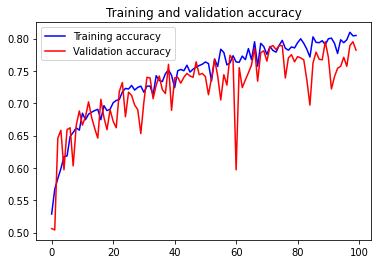

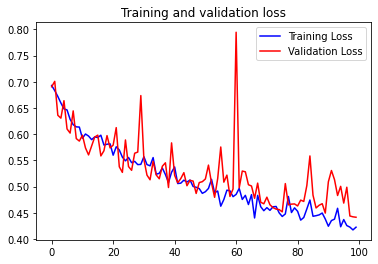

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 练手：加入dropout观察效果

tf.keras.layers.Dropout(0.5)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 41s - loss: 0.6918 - acc: 0.5189 - val_loss: 0.6863 - val_acc: 0.6220
Epoch 2/100
100/100 - 28s - loss: 0.6908 - acc: 0.5144 - val_loss: 0.6881 - val_acc: 0.5040
Epoch 3/100
100/100 - 26s - loss: 0.6821 - acc: 0.5780 - val_loss: 0.6627 - val_acc: 0.5900
Epoch 4/100
100/100 - 25s - loss: 0.6733 - acc: 0.5765 - val_loss: 0.6606 - val_acc: 0.5710
Epoch 5/100
100/100 - 25s - loss: 0.6580 - acc: 0.6088 - val_loss: 0.6376 - val_acc: 0.6160
Epoch 6/100
100/100 - 25s - loss: 0.6468 - acc: 0.6290 - val_loss: 0.6206 - val_acc: 0.6550
Epoch 7/100
100/100 - 26s - loss: 0.6272 - acc: 0.6547 - val_loss: 0.6049 - val_acc: 0.6610
Epoch 8/100
100/100 - 29s - loss: 0.6289 - acc: 0.6386 - val_loss: 0.6110 - val_acc: 0.6490
Epoch 9/100
100/100 - 25s - loss: 0.6238 - acc: 0.6567 - val_loss: 0.5936 - val_acc: 0.6650
Epoch 10/100
100/100 - 25s - loss: 0.6084 - acc: 0.6709 - val_loss: 0.5755 - val_acc: 0.6950
Epoch 11/100
100/100 - 25s - loss: 0.6116 - acc: 0.6658 - val_loss: 0.5942 - va

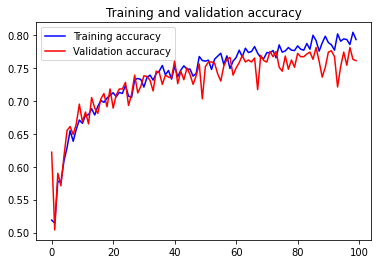

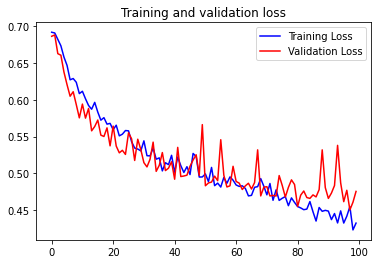

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()